In [1]:
import h5py
import helpers

In [2]:
# read sinbad data
exp_results = h5py.File('experimental_results.h5', 'r')
mcnp_results_fendl = h5py.File('mcnp_results_fendl2.h5', 'r')
mcnp_results_jendl = h5py.File('mcnp_results_jendl33.h5', 'r')

In [3]:
import os
import openmc
foil = 'nb93'
detector_volume = 4**2
statepoint_file = 'statepoint.100.h5'
tally_name = f'{foil}_irdff_rr'

os.chdir('results')
sp = openmc.StatePoint(statepoint_file)
tally = sp.get_tally(name=tally_name).get_pandas_dataframe()
os.chdir('..')
# print(tally)

omc_fendl = helpers.get_openmc_tally('statepoint.100.h5', f'{foil}_irdff_rr')
# omc_fendl = helpers.postprocess_openmc_foils(omc_fendl)

# print(omc_fendl)


# # os.chdir('results')
# omc_fendl = helpers.get_openmc_tally('statepoint.100.h5', f'{foil}_irdff_rr')
# # os.chdir('..')
# omc_fendl = helpers.postprocess_openmc_foils(omc_fendl)
# ciao = openmc.StatePoint('statepoint.100.h5')
# ciao.tallies
# ciao.get_tally(name=f'{foil}_irdff_rr').get_pandas_dataframe()

# df = ciao.loc[(ciao['particle'] == 'neutron')]

# df = df[df['cell'].isin(_foil_cells)]
# df['mean'] = df['mean'] / _detector_volume
# df['std. dev.'] = df['std. dev.'] / _detector_volume

/home/segantin/openmc_models/models/openmc_sinbad_benchmarks_REWORK/openmc_sinbad_benchmarks/models/fns_duct/helpers.py:44: RuntimeWarning: invalid value encountered in divide
  return dataset['std. dev.'] / dataset['mean']


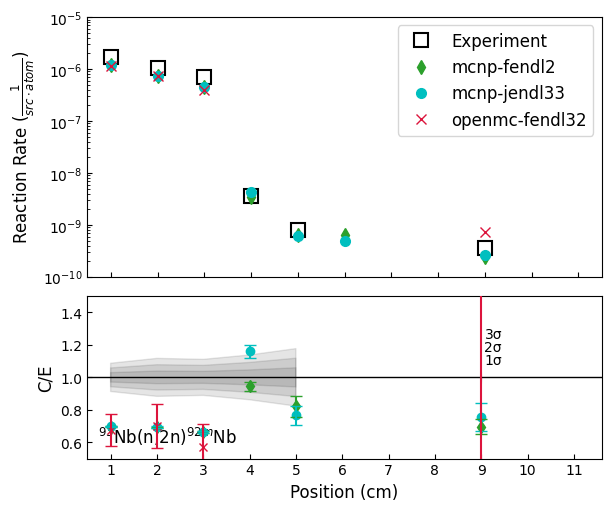

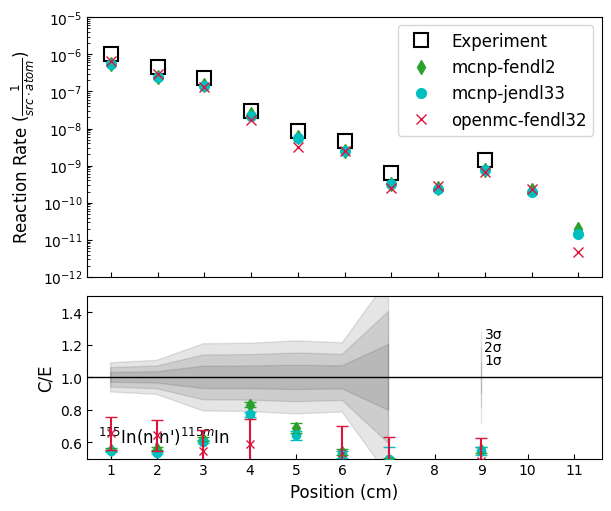

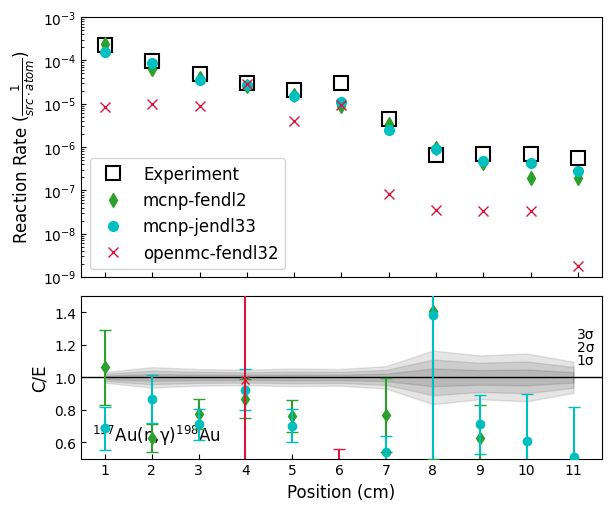

In [4]:
# initialization
path = 'reaction_rates/'
foil_list = ['nb93', 'in115', 'au197']
reaction_labels = ['$^{93}$Nb(n,2n)$^{92m}$Nb', '$^{115}$In(n,n\')$^{115m}$In', '$^{197}$Au(n,\u03B3)$^{198}$Au']
ylabel = r'Reaction Rate $(\frac{1}{src \cdot atom})$'

for i,foil in enumerate(foil_list):
    measured = exp_results[path + f'{foil}/table']
    mcnp_fendl = mcnp_results_fendl[path + f'{foil}/table']
    mcnp_jendl = mcnp_results_jendl[path + f'{foil}/table']

    # # read openmc results from its statepoint file
    # omc_fendl = helpers.get_openmc_tally('statepoint.100.h5', f'{foil}_irdff_rr')
    # omc_fendl = helpers.postprocess_openmc_foils(omc_fendl)

    os.chdir('results')
    sp = openmc.StatePoint('statepoint.100.h5')
    tally = sp.get_tally(name=f'{foil}_irdff_rr').get_pandas_dataframe()
    os.chdir('..')
    omc_fendl = helpers.postprocess_openmc_foils(tally)

    # plot
    dtype_label = reaction_labels[i]
    foils = helpers.PlotReactionRates()  # the plot has always to be initialized like this
    foils.add_measured_data(measured, ylabel, dtype_label)  # measured data have always to be plotted
    foils.add_computed_data(mcnp_fendl, 'd', 'tab:green', 'mcnp-fendl2')  # one can add as many computed data as preferred
    foils.add_computed_data(mcnp_jendl, 'o', 'c', 'mcnp-jendl33')
    foils.add_computed_data(omc_fendl, 'x', 'crimson', 'openmc-fendl32')

     cell particle  energy low [eV]  energy high [eV] nuclide score  \
366   303  neutron     1.001000e-05      3.224100e-01   total  flux   
367   303  neutron     3.224100e-01      5.315600e-01   total  flux   
368   303  neutron     5.315600e-01      8.764000e-01   total  flux   
369   303  neutron     8.764000e-01      1.444900e+00   total  flux   
370   303  neutron     1.444900e+00      2.382300e+00   total  flux   
..    ...      ...              ...               ...     ...   ...   
483   303  neutron     1.455000e+07      1.477900e+07   total  flux   
484   303  neutron     1.477900e+07      1.501200e+07   total  flux   
485   303  neutron     1.501200e+07      1.524800e+07   total  flux   
486   303  neutron     1.524800e+07      1.548800e+07   total  flux   
487   303  neutron     1.548800e+07      1.573200e+07   total  flux   

             mean     std. dev.  
366  8.104730e-11  8.104730e-11  
367  0.000000e+00  0.000000e+00  
368  3.257070e-09  3.257070e-09  
369  0.0000

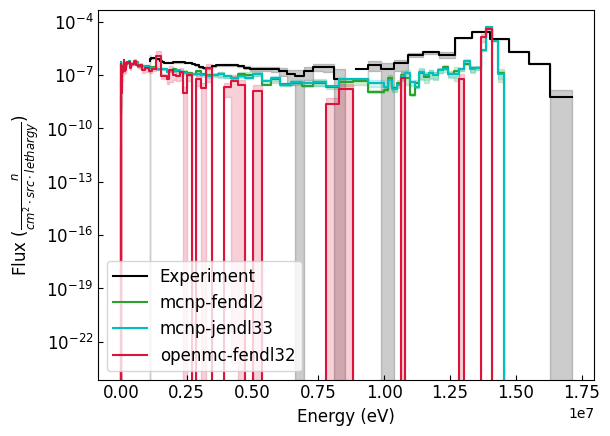

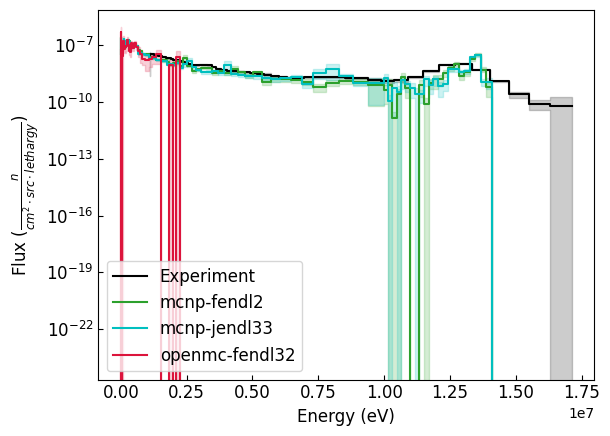

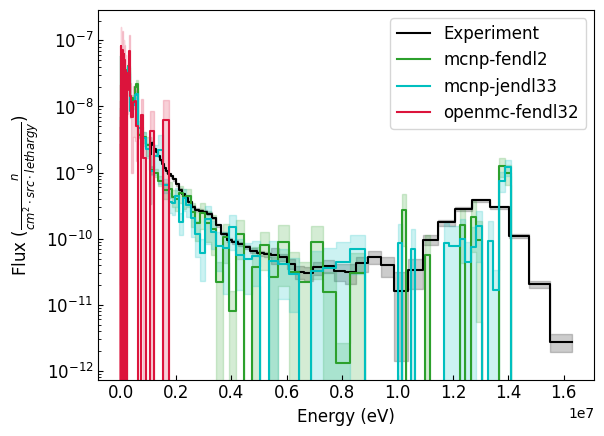

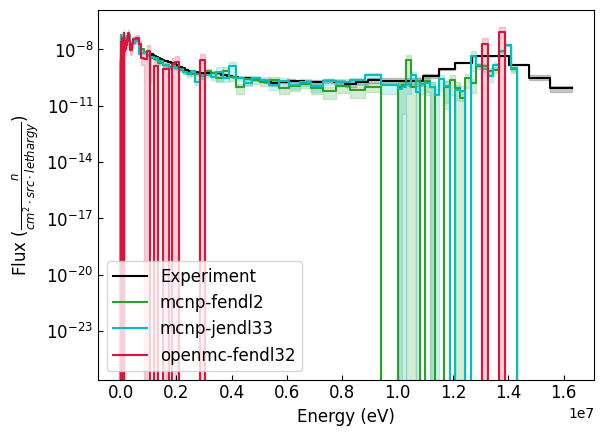

In [5]:
path = 'energy_spectra/'
detector_list = ['detector_3', 'detector_5', 'detector_7', 'detector_9']
detector_labels = ['detector 3', 'detector 5', 'detector 7', 'detector 9']
detector_cells = [303, 305, 307, 309]
ylabel = r'Flux $(\frac{n}{cm^2 \cdot src \cdot lethargy})$'

for i, dl in enumerate(detector_list):
    measured = exp_results[path + f'{dl}/table']
    mcnp_fendl = mcnp_results_fendl[path + f'{dl}/table']
    mcnp_jendl = mcnp_results_jendl[path + f'{dl}/table']
    
    # omc_fendl = helpers.get_openmc_tally('statepoint.100.h5', 'detector_nspectrum')
    # omc_fendl = helpers.postprocess_openmc_spectrum(omc_fendl, detector_cells[i])

    os.chdir('results')
    sp = openmc.StatePoint('statepoint.100.h5')
    omc_fendl = sp.get_tally(name='detector_nspectrum').get_pandas_dataframe()
    os.chdir('..')
    omc_fendl = helpers.postprocess_openmc_spectrum(omc_fendl, detector_cells[i])

    # plot
    dtype_label = detector_labels[i]
    spectra = helpers.PlotEnergySpectra()  # the plot has always to be initialized like this
    spectra.add_measured_data(measured, ylabel, dtype_label)  # measured data have always to be plotted
    spectra.add_computed_data(mcnp_fendl, 'tab:green', 'mcnp-fendl2')  # one can add as many computed data as preferred
    spectra.add_computed_data(mcnp_jendl, 'c', 'mcnp-jendl33')
    spectra.add_computed_data(omc_fendl, 'crimson', 'openmc-fendl32')